In [37]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import de2 as de
import multiprocessing as mp
import makeqx as mkq
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

def rndtop5(x):
    return np.round(x*2.0)/2

def tmm_wrapper2(arg):
    args, kwargs = arg
    return mkq.vgdr_eval_wsweep(*args, **kwargs)

def arc_par(pop, **kwargs):
    jobs = []
    pool=mp.Pool(90)
    #num_layers = int(pop[0].size/2)
    for indiv in pop:
        #jobs.append((indiv.reshape(num_layers,2), 0))
        jobs.append((indiv, 0))
    arg = [(j, kwargs) for j in jobs]
    answ = np.array(pool.map(tmm_wrapper2, arg))
    pool.close()
    return answ

num_layers = 8
norlam_min = 0.25   # this is lam/d
norlam_max = 1.5 # this is lam/d
lam_pts = 256


bnds = [(0, 1)]*num_layers
its_first = 0
psnew = 160
islands = 5
its_second = 200

numgens = 2

# isl = np.ones((psnew*islands, num_layers))
# for indiv in range(int(psnew*islands)):
#     isl[indiv] = np.random.uniform(0,1, num_layers)
# # #     nxhold = isl[indiv][::2]
# # #     nxhold[::2] = 1
# # #     nxhold[1::2] = 0
# # #  isl[indiv] = qn.make_qxn(num_layers, dlevels=2)
# poplist = np.split(isl, islands)

bids = np.zeros(islands, dtype=int)
bfits = np.zeros(islands)
bests = isl[0:islands]

for gen in range(numgens):
    print("==============================")
    print("Epoch #:" + str(gen + 1))
    print("==============================")
    
    for isln in range(islands):
        print("----------------- I-" + str(isln + 1)+ "---------------------")
        poplist[isln], bids[isln], bfits[isln], bests[isln] = de.de_cp(
            fobj=arc_par, 
            bounds=bnds, 
            pop=poplist[isln], 
            history=[], 
            it_start=its_first, 
            popsize=psnew, 
            its=its_second, 
            lam_low=norlam_min, 
            lam_high=norlam_max, 
            lam_pts=lam_pts)
        
#     if its_second > 64:
#         its_second = int(its_second/2)
    
    if gen < (numgens - 1):
        print("Round robin best migration")
        stmp = np.copy(poplist[islands-1][bids[islands-1]])
        for isln in range(1, islands):
            poplist[isln][bids[isln]] = poplist[isln-1][bids[isln-1]]
        poplist[0][bids[0]] = stmp 
    
print(bfits)






Epoch #:1
----------------- I-1---------------------
19 0.2329746928277702
39 0.23296960625078644
59 0.2329683031558343
79 0.23296830231118462
99 0.23296830229031726
119 0.23296830228982082
139 0.23296830228979928
159 0.23296830228979892
179 0.23296830228979884
199 0.23296830228979884
----------------- I-2---------------------
19 0.797467250763613
39 0.797467250763613
59 0.797467250763613
79 0.797467250763613
99 0.797467250763613
119 0.797467250763613
139 0.797467250763613
159 0.7974672507636129
179 0.7974672507636129
199 0.7974672507636129
----------------- I-3---------------------
19 0.23296063519219054
39 0.23295898638401366
59 0.2329588988009353
79 0.23295889805188805
99 0.23295889789682397
119 0.2329588978941721
139 0.232958897894096
159 0.23295889789409135
179 0.23295889789409077
199 0.23295889789409024
----------------- I-4---------------------
19 0.9524239664387182
39 0.9524239664387182
59 0.9524239664387182
79 0.9524239664387182
99 0.9524239664387182
119 0.9524239664387182
139

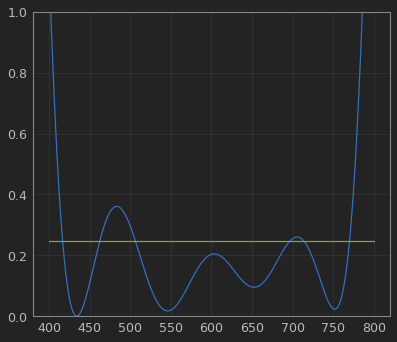

In [42]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import makeqx as mkq
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

qx = bests[np.argmin(bfits)]


norlam_min = 0.25   # this is lam/d
norlam_max = 1.5       # this is lam/d
lam_pts = 256
#lams = np.linspace(lam_low, lam_high, endpoint=True, num=lam_pts)
lam_inv = np.linspace(1/norlam_min, 1/norlam_max, num=lam_pts, endpoint=True)
lams = 1.0/lam_inv



Rs = np.zeros(lams.size)
Rs = mkq.tmm_eval_wsweep(qx, 0, lam_low=norlam_min, lam_high=norlam_max, lam_pts=lam_pts)

vgdr = 100*np.ones(lam_pts)
for idx, lam in enumerate(lams):
    if lams[idx] <= 1:
        cuts = Rs[np.logical_and(lams >= lam, lams <= 2*lam)]
        #print(cuts)
        vgdr[idx] = np.mean(cuts)
#         print(vgdr)



#400.0/np.amin(vgdr)


# lams
c, cthick = mkq.vgdr2_eval_wsweep(qx = qx, inc_ang=0, lam_low=norlam_min, lam_high=norlam_max, lam_pts=lam_pts)


# num_layers = 10
# # qx = np.random.uniform(0,1, (num_layers,2))
# # qx[:,0] = qx[:,0]/np.sum(qx[:,0])

norlam_min = 400.0/cthick   # this is lam/d
norlam_max = 800.0/cthick       # this is lam/d
lam_pts = 256

lam_inv = np.linspace(1/norlam_min, 1/norlam_max, num=lam_pts, endpoint=True)
lams = (1.0/lam_inv)
lam_ac = np.linspace(400, 800,  num=lam_pts, endpoint=True)
lams2 = np.linspace(400, 800, endpoint=True, num = lam_pts)
#lams = np.flip(lams, axis=0)

# # # for thick in [200, 400, 800]:
# # qx[:,1] = mkq.digitize_qx(qx[:,1], dlevels=2)
# d_x, n_x = mkq.make_nxdx(qx=qx)

Rs2 = mkq.tmm_eval_wsweep(qx = qx, inc_ang=0, lam_low=norlam_min, lam_high=norlam_max, lam_pts=lam_pts)
# lams = cthick*lams
meansl = np.mean(Rs2)*np.ones_like(lams)
# #     #plt.plot(1.0/lams, Rs)
# plt.plot( Rs)
# #plt.plot(lams, meansl)
plt.ylim([0,1])
#plt.xlim([0.75,1.1])
    

plt.plot(lams2, Rs2)
plt.plot(lams2, meansl)


In [43]:
c, cthick, cthick*qx/(np.sum(qx))

(0.23265694156412065,
 637.9084967320262,
 array([  0.        ,  93.94781328,  29.2463678 ,   6.49963796,
         72.73994762,  34.09921199,  12.7687302 , 388.60678789]))

In [ ]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import makeqx as mkq
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()


num_layers = 50

layers = np.arange(num_layers)
nlr = np.random.uniform(0,1, num_layers)
#nlr = mkq.make_qx(num_layers)
#nlr = mkq.digitize_qx(nlr, dlevels=2)
#plt.bar(layers, nlr)
#plt.ylim([0,1])

lam_inv = np.linspace(0.2, 2, num=50, endpoint=True)
lams = (1.0/lam_inv)
lams = np.flip(lams, axis=0)

for thick in [200, 400, 800]:
    d_x, n_x = mkq.make_nxdx(qx=nlr, cthick=thick, wavelen=550)
    Rs = mkq.tmm_eval_wsweep(qx = nlr, cthick=thick, inc_ang=0, lam_low = 0.5*thick, lam_high=5*thick, lam_pts=50)
    #plt.plot(1.0/lams, Rs)
    plt.plot(lams, Rs)
    plt.ylim([0,100])


vgdr = np.zeros(25)
for idx, lam in enumerate(lams):
    if idx < 25:
        cuts = Rs[np.logical_and(lams >= lam, lams <= 2*lam)]
        vgdr[idx] = np.mean(cuts)
# plt.plot(vgdr)
# plt.ylim([0,100])

size =  400/lams[np.argmin(vgdr)]
val = np.amin(vgdr)
size, val

In [ ]:
#\][;/++plt.plot(Rs)
# for fd in zip(lams, Rs):
#     print(fd)

In [ ]:
c 

In [ ]:
np.mean(Rs2)

In [ ]:
vgdr[178]

In [ ]:
400.0/lams[178]